# Init

In [1]:
from scipy.io import arff
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, BatchNormalization, Dropout, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.datasets import cifar10
from keras import optimizers, metrics
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from os import path

In [2]:
optimizers_dict = {
    'SGD': optimizers.SGD(),
    'RMSprop': optimizers.RMSprop(),
    # 'Adam': optimizers.Adam(),
    # 'Adadelta': optimizers.Adadelta(),
    # 'Adagrad': optimizers.Adagrad(),
    # 'Adamax': optimizers.Adamax(),
    # 'Nadam': optimizers.Nadam(),
    # 'Ftrl': optimizers.Ftrl()
}

metrics_list= [metrics.CategoricalCrossentropy() ,metrics.MeanSquaredError(), metrics.BinaryAccuracy(), metrics.CategoricalAccuracy(), 
           metrics.AUC(), metrics.Precision(), metrics.Recall(), metrics.FalsePositives(), 
           metrics.FalseNegatives(), metrics.TruePositives(), metrics.TrueNegatives()]
#Dlaczego ja ciągle siedze na tych studiach? +1

# Base

In [3]:
def fitWithKfold(X, y, model, epochs, metric_values):
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    for train, test in kfold.split(X):
        history = model.fit(X[train], y[train], epochs=epochs, batch_size=10, verbose=0)
        scores = model.evaluate(X[test], y[test], verbose=0)
        # Store metrics
        for metric in metrics_list:
            metric_values[metric.name].append(history.history[metric.name])
    # Wyświetlenie wyników walidacji krzyżowej K-fold
    out_text = ''
    for i, names in enumerate(model.metrics_names):
        # with open(path.join('out_text', f'{plots_name}_{oprimizer_name}_metrics.png'), 'w') as f:
        #     f.write(f'Metric: {names} -> Score: {scores[i]}')
        # print(f'Metric: {names} -> Score: {scores[i]}')
        out_text += f'Metric: {names} -> Score: {scores[i]}\n'

    return out_text, metric_values

def loadPrepareDataforArff(datafile):
    # Load the dataset
    data = arff.loadarff(datafile)
    dataset = pd.DataFrame(data[0])

    # Let's assume the last column is the target
    X = dataset.iloc[:, :-1].values
    y = dataset.iloc[:, -1].values

    # Encode the string target variables to integers
    le = LabelEncoder()
    y = le.fit_transform(y)

    # Transform target to one-hot encoding
    y = to_categorical(y)

    # Reshape X to be 3D, [samples, timesteps, features]
    X = X.reshape(X.shape[0], X.shape[1], 1)
    return (X, y, X.shape[1], y.shape[1])

def run_and_generate_output(data_function, data_name, model_function, plots_name):
    X, y, in_dim, out_dim = data_function(data_name)
    for oprimizer_name,oprimizer in optimizers_dict.items():

        metric_values = {metric.name: [] for metric in metrics_list}

        model = model_function(in_dim, out_dim, oprimizer, metrics_list)
        out_text = ''
        # print(f'{plots_name} classification model for optimizer: {oprimizer_name}')
        out_text += f'{plots_name} classification model for optimizer: {oprimizer_name}\n'
        text, metric_values = fitWithKfold(X, y, model, 20, metric_values)
        out_text += f'{text}\n'
        print(out_text)
        with open(path.join('out_text', f'{plots_name}_{oprimizer_name}_metrics.txt'), 'w') as f:
            f.write(out_text)
        fig, axs = plt.subplots(4, 3, figsize=(32, 32))
        fig.suptitle(f'Metrics for {oprimizer_name}')
        
        for ax, (metric_name, values) in zip(axs.flat, metric_values.items()):
            for i, value in enumerate(values):
                ax.plot(value, label=f"fold {i+1}")
            ax.set_title(metric_name)
            ax.set_xlabel("Epoch")
            ax.set_ylabel(metric_name)
            ax.legend(prop={'size': 6})
        
        # Save the plot to a file
        plt.subplots_adjust(top=0.95)
        plt.savefig(path.join('out_plots', f'{plots_name}_{oprimizer_name}_metrics.png'))

        plt.show()

# Iris

In [4]:
def loadPreapreDataForIris(datafile, skiprows = 0, delimiter=","):
    dataset = pd.read_csv(datafile,delimiter=delimiter, skiprows=skiprows)
    X = dataset.iloc[:, :-1].values
    y = dataset.iloc[:, -1].values

    encoder = LabelEncoder()
    encoder.fit(y)
    y_enc = encoder.transform(y)
    y_cat = to_categorical(y_enc)
    print(X[0].size, y_cat[0].size)
    return (X, y_cat, X[0].size, y_cat[0].size)

In [5]:
def getModelForIris(in_dim, out_dim, optimizer, metrics):
    model = Sequential()
    model.add(Conv1D(64, 3, activation='relu', input_shape=(in_dim, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(out_dim, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=metrics)
    return model

4 3

Raisin classyfication model for optimizer: SGD
Metric: loss -> Score: 0.14048460125923157
Metric: categorical_crossentropy -> Score: 0.14048460125923157
Metric: mean_squared_error -> Score: 0.02784227952361107
Metric: binary_accuracy -> Score: 0.9523809552192688
Metric: categorical_accuracy -> Score: 0.9285714030265808
Metric: auc -> Score: 0.9923468828201294
Metric: precision -> Score: 0.9285714030265808
Metric: recall -> Score: 0.9285714030265808
Metric: false_positives -> Score: 1.0
Metric: false_negatives -> Score: 1.0
Metric: true_positives -> Score: 13.0
Metric: true_negatives -> Score: 27.0


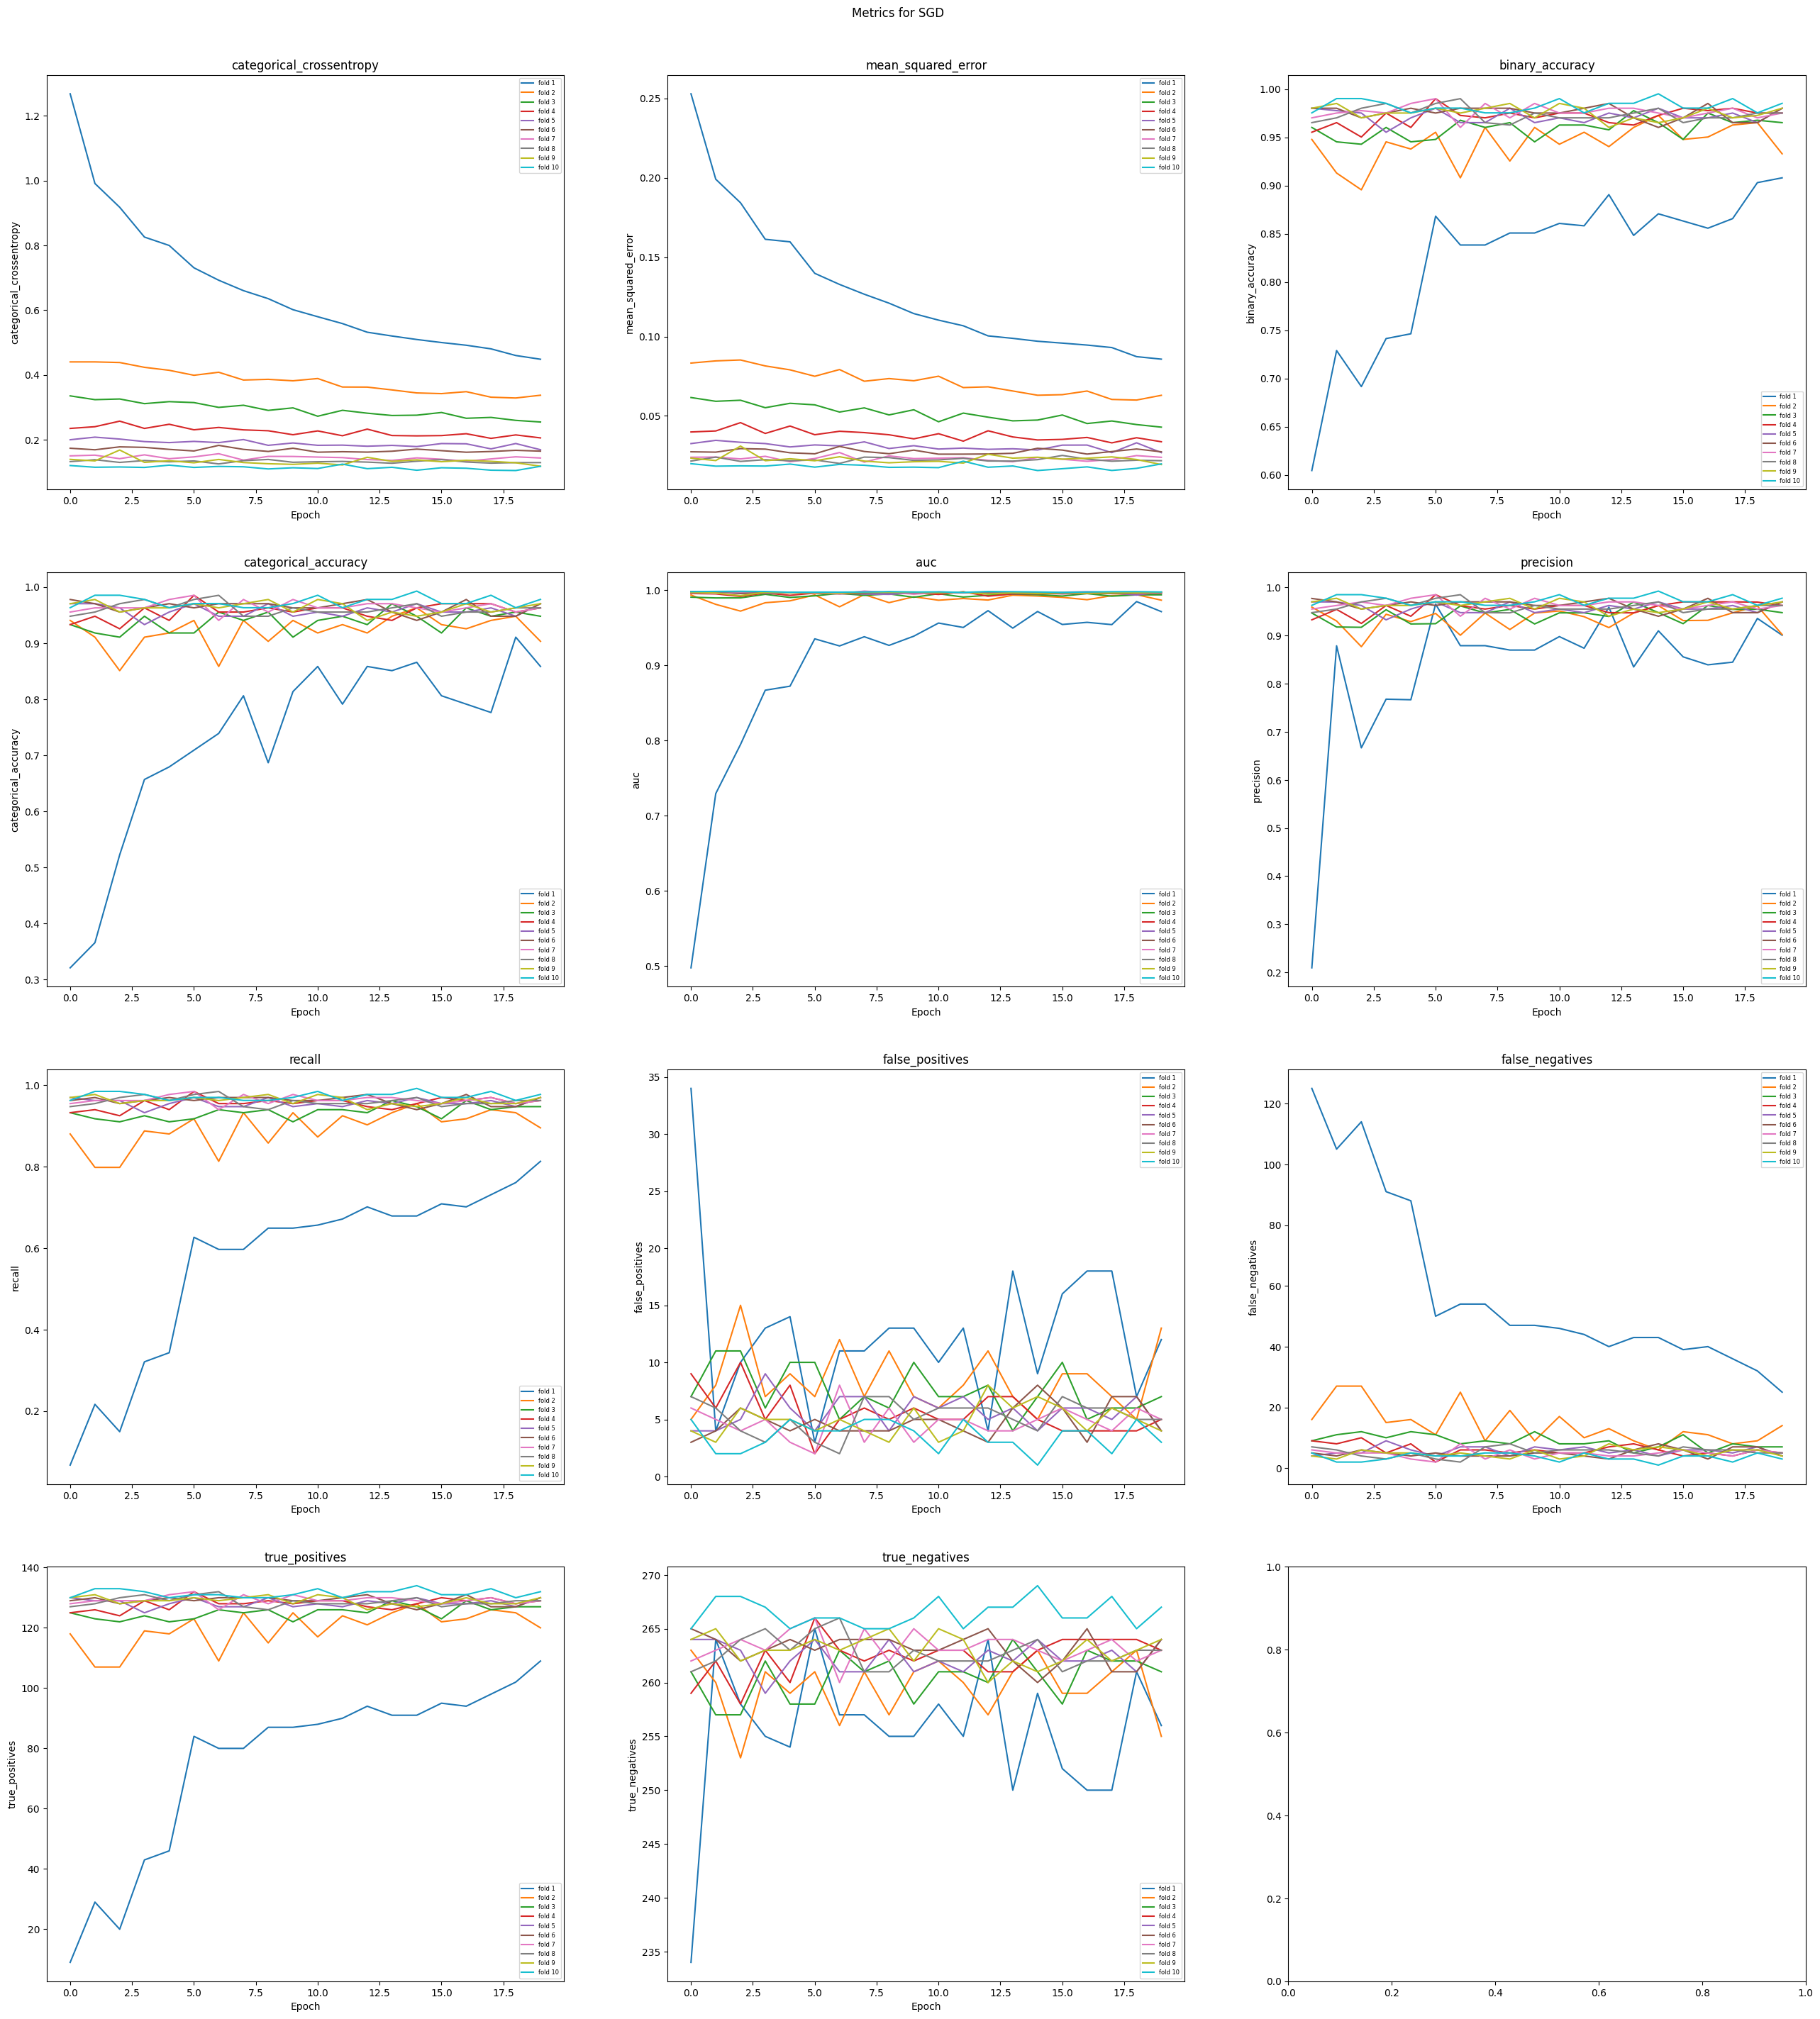


Raisin classyfication model for optimizer: RMSprop
Metric: loss -> Score: 0.11325723677873611
Metric: categorical_crossentropy -> Score: 0.11325723677873611
Metric: mean_squared_error -> Score: 0.02715677209198475
Metric: binary_accuracy -> Score: 0.9523809552192688
Metric: categorical_accuracy -> Score: 0.9285714030265808
Metric: auc -> Score: 0.9974489212036133
Metric: precision -> Score: 0.9285714030265808
Metric: recall -> Score: 0.9285714030265808
Metric: false_positives -> Score: 1.0
Metric: false_negatives -> Score: 1.0
Metric: true_positives -> Score: 13.0
Metric: true_negatives -> Score: 27.0


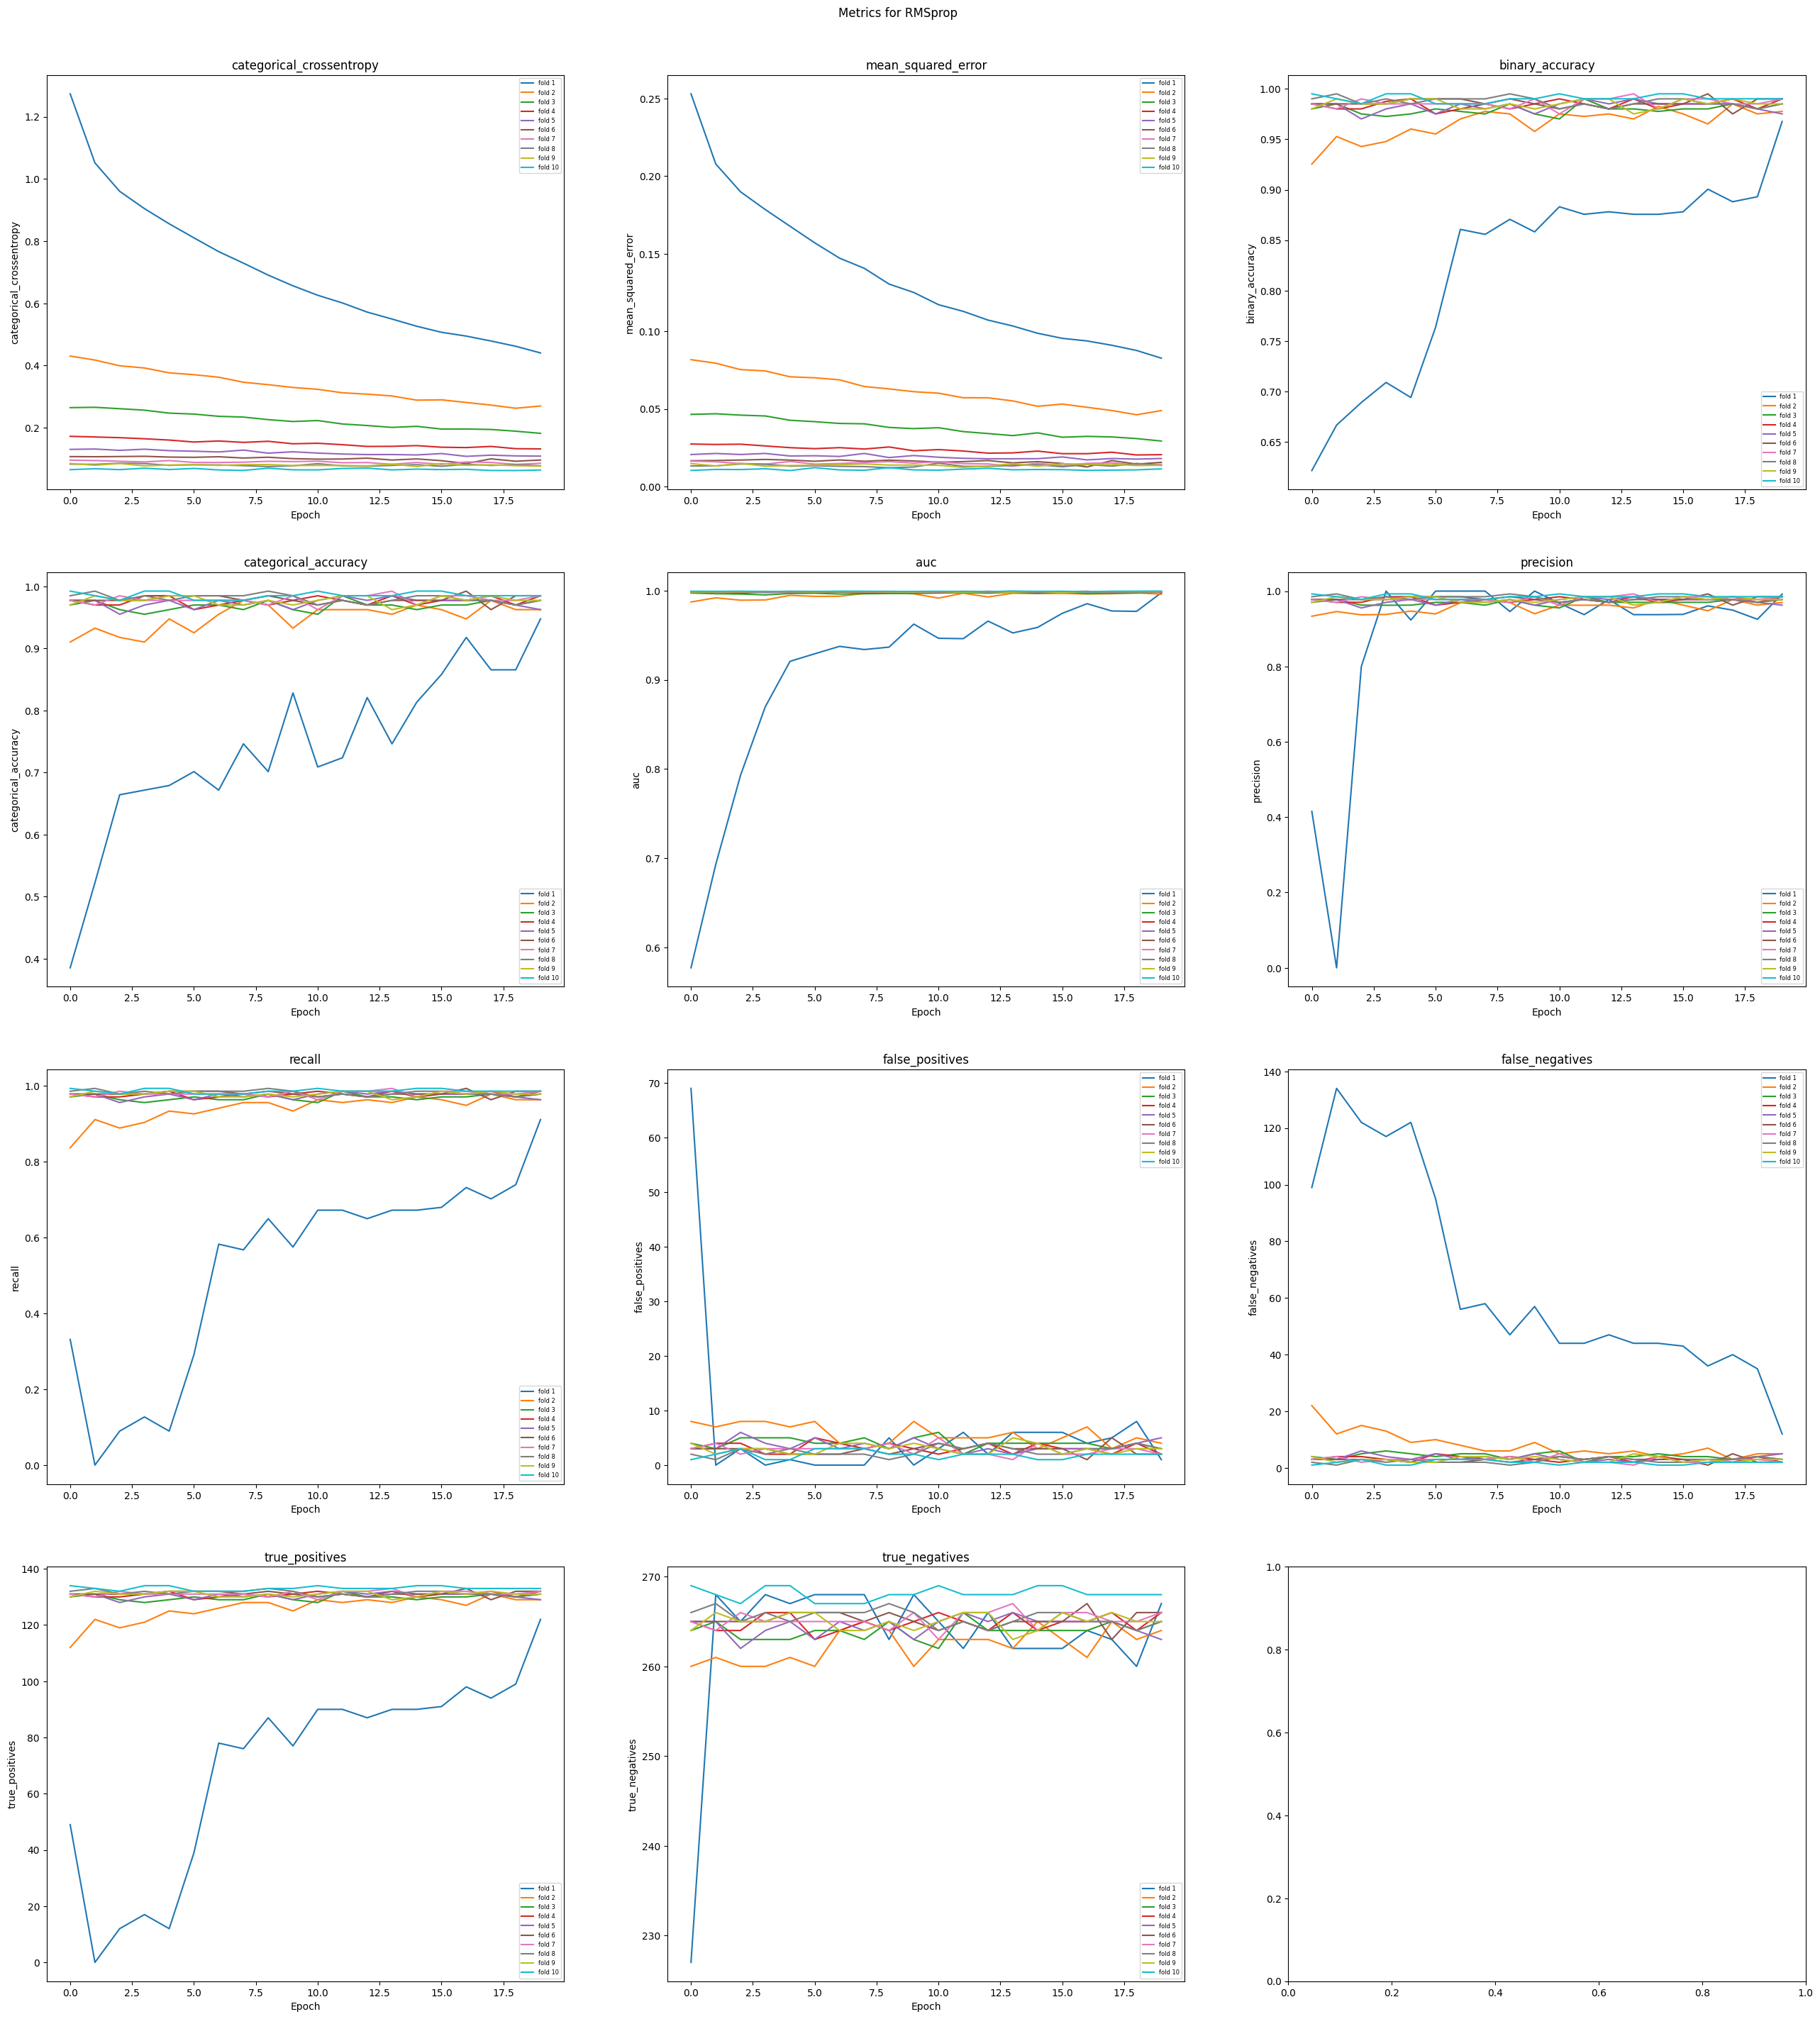

In [6]:
run_and_generate_output(loadPreapreDataForIris, 'iris.data', getModelForIris, 'Iris')

# CIFAR-10

In [4]:
def loadPreapreDataForCifar(*args):
    # Load the dataset
    (X_train, y_train), (X_test, y_test) = cifar10.load_data()

    # Normalize the data
    X_train = X_train / 255.0

    # Transform target to one-hot encoding
    y_train = to_categorical(y_train)

    return (X_train, y_train, (32, 32, 3), 10)

def getModelForCifar(in_dim, out_dim, optimizer, metrics_list):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(Dropout(0.2))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Dropout(0.2))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=metrics_list)
    return model

In [5]:
run_and_generate_output(loadPreapreDataForCifar, None, getModelForCifar, 'CIFAR')


Raisin classyfication model for optimizer: SGD


# Dry_Bean

In [7]:
def getModelForDryBean(in_dim, out_dim, optimizer, metric):
    model = Sequential()
    model.add(Conv1D(32, 2, activation='relu', input_shape=(in_dim, 1)))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(Conv1D(64, 2, activation='relu'))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(out_dim, activation='softmax'))
    
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=metric)
    return model


Raisin classyfication model for optimizer: SGD
Metric: loss -> Score: 23.801172256469727
Metric: categorical_crossentropy -> Score: 23.801172256469727
Metric: mean_squared_error -> Score: 0.22586962580680847
Metric: binary_accuracy -> Score: 0.7709667086601257
Metric: categorical_accuracy -> Score: 0.19397501647472382
Metric: auc -> Score: 0.5496797561645508
Metric: precision -> Score: 0.19479553401470184
Metric: recall -> Score: 0.19250550866127014
Metric: false_positives -> Score: 1083.0
Metric: false_negatives -> Score: 1099.0
Metric: true_positives -> Score: 262.0
Metric: true_negatives -> Score: 7083.0


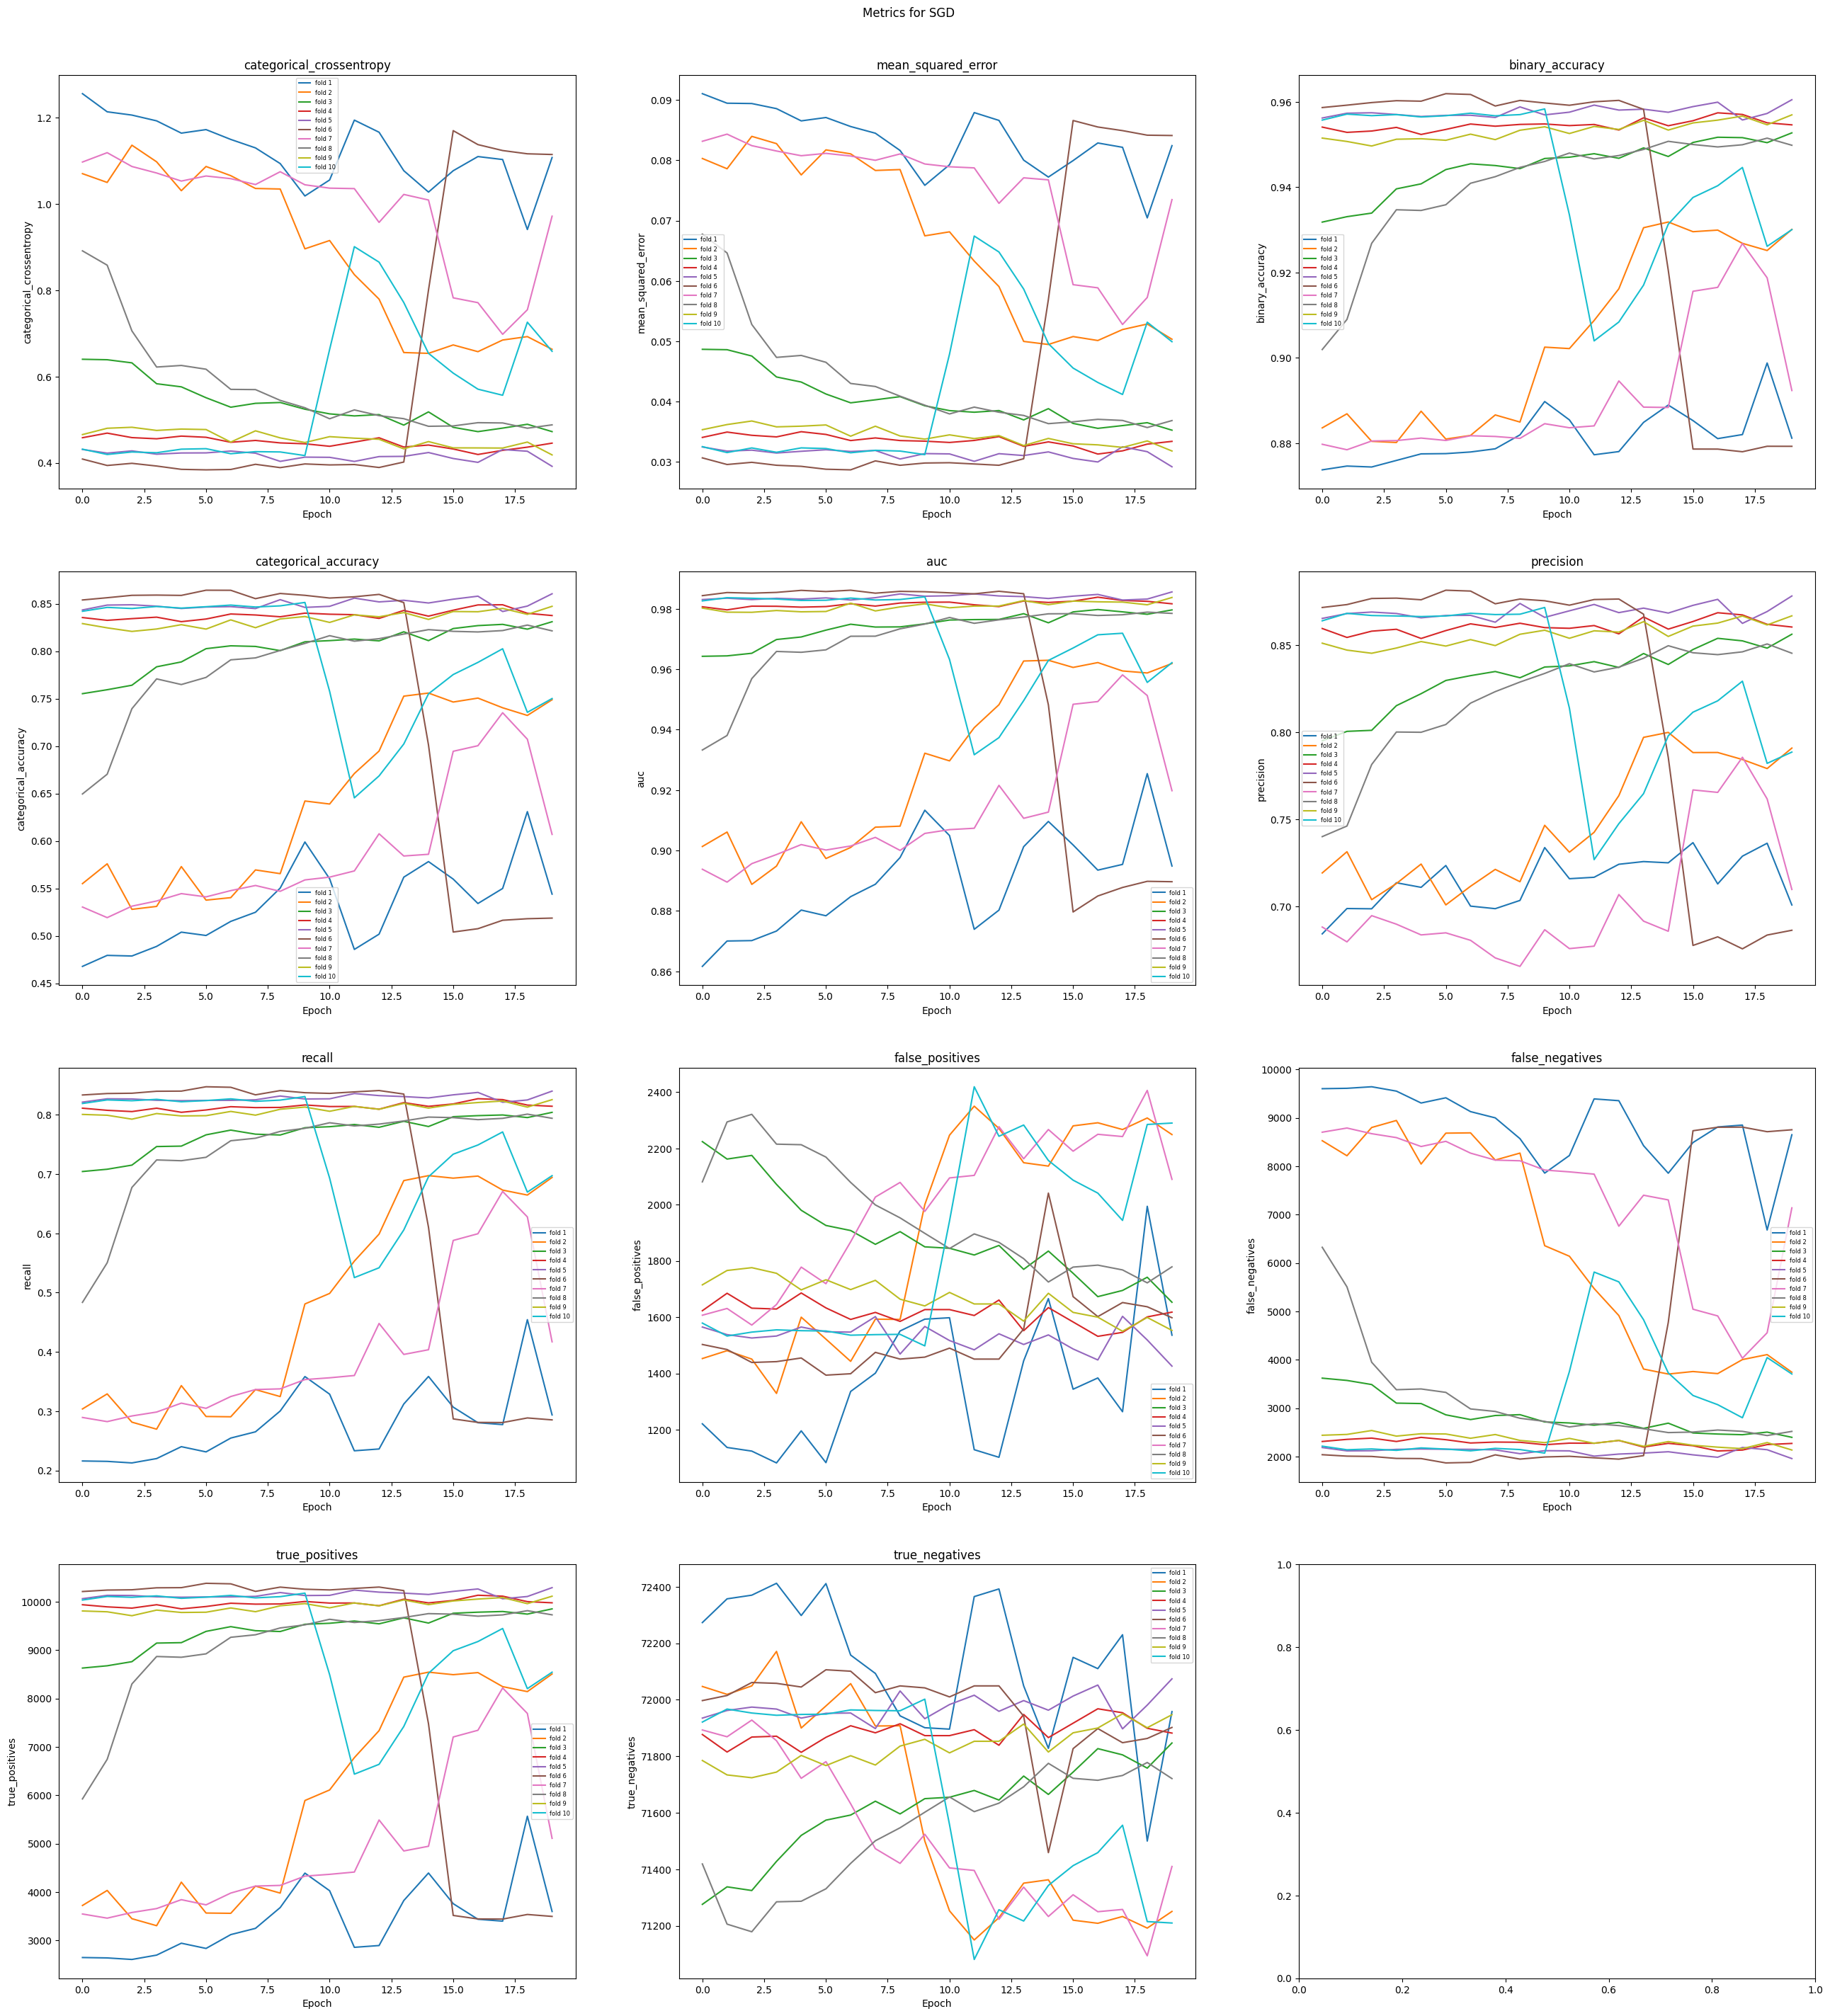


Raisin classyfication model for optimizer: RMSprop
Metric: loss -> Score: 27.54536247253418
Metric: categorical_crossentropy -> Score: 27.54536247253418
Metric: mean_squared_error -> Score: 0.19710567593574524
Metric: binary_accuracy -> Score: 0.7999370098114014
Metric: categorical_accuracy -> Score: 0.2997795641422272
Metric: auc -> Score: 0.5894044637680054
Metric: precision -> Score: 0.2997795641422272
Metric: recall -> Score: 0.2997795641422272
Metric: false_positives -> Score: 953.0
Metric: false_negatives -> Score: 953.0
Metric: true_positives -> Score: 408.0
Metric: true_negatives -> Score: 7213.0


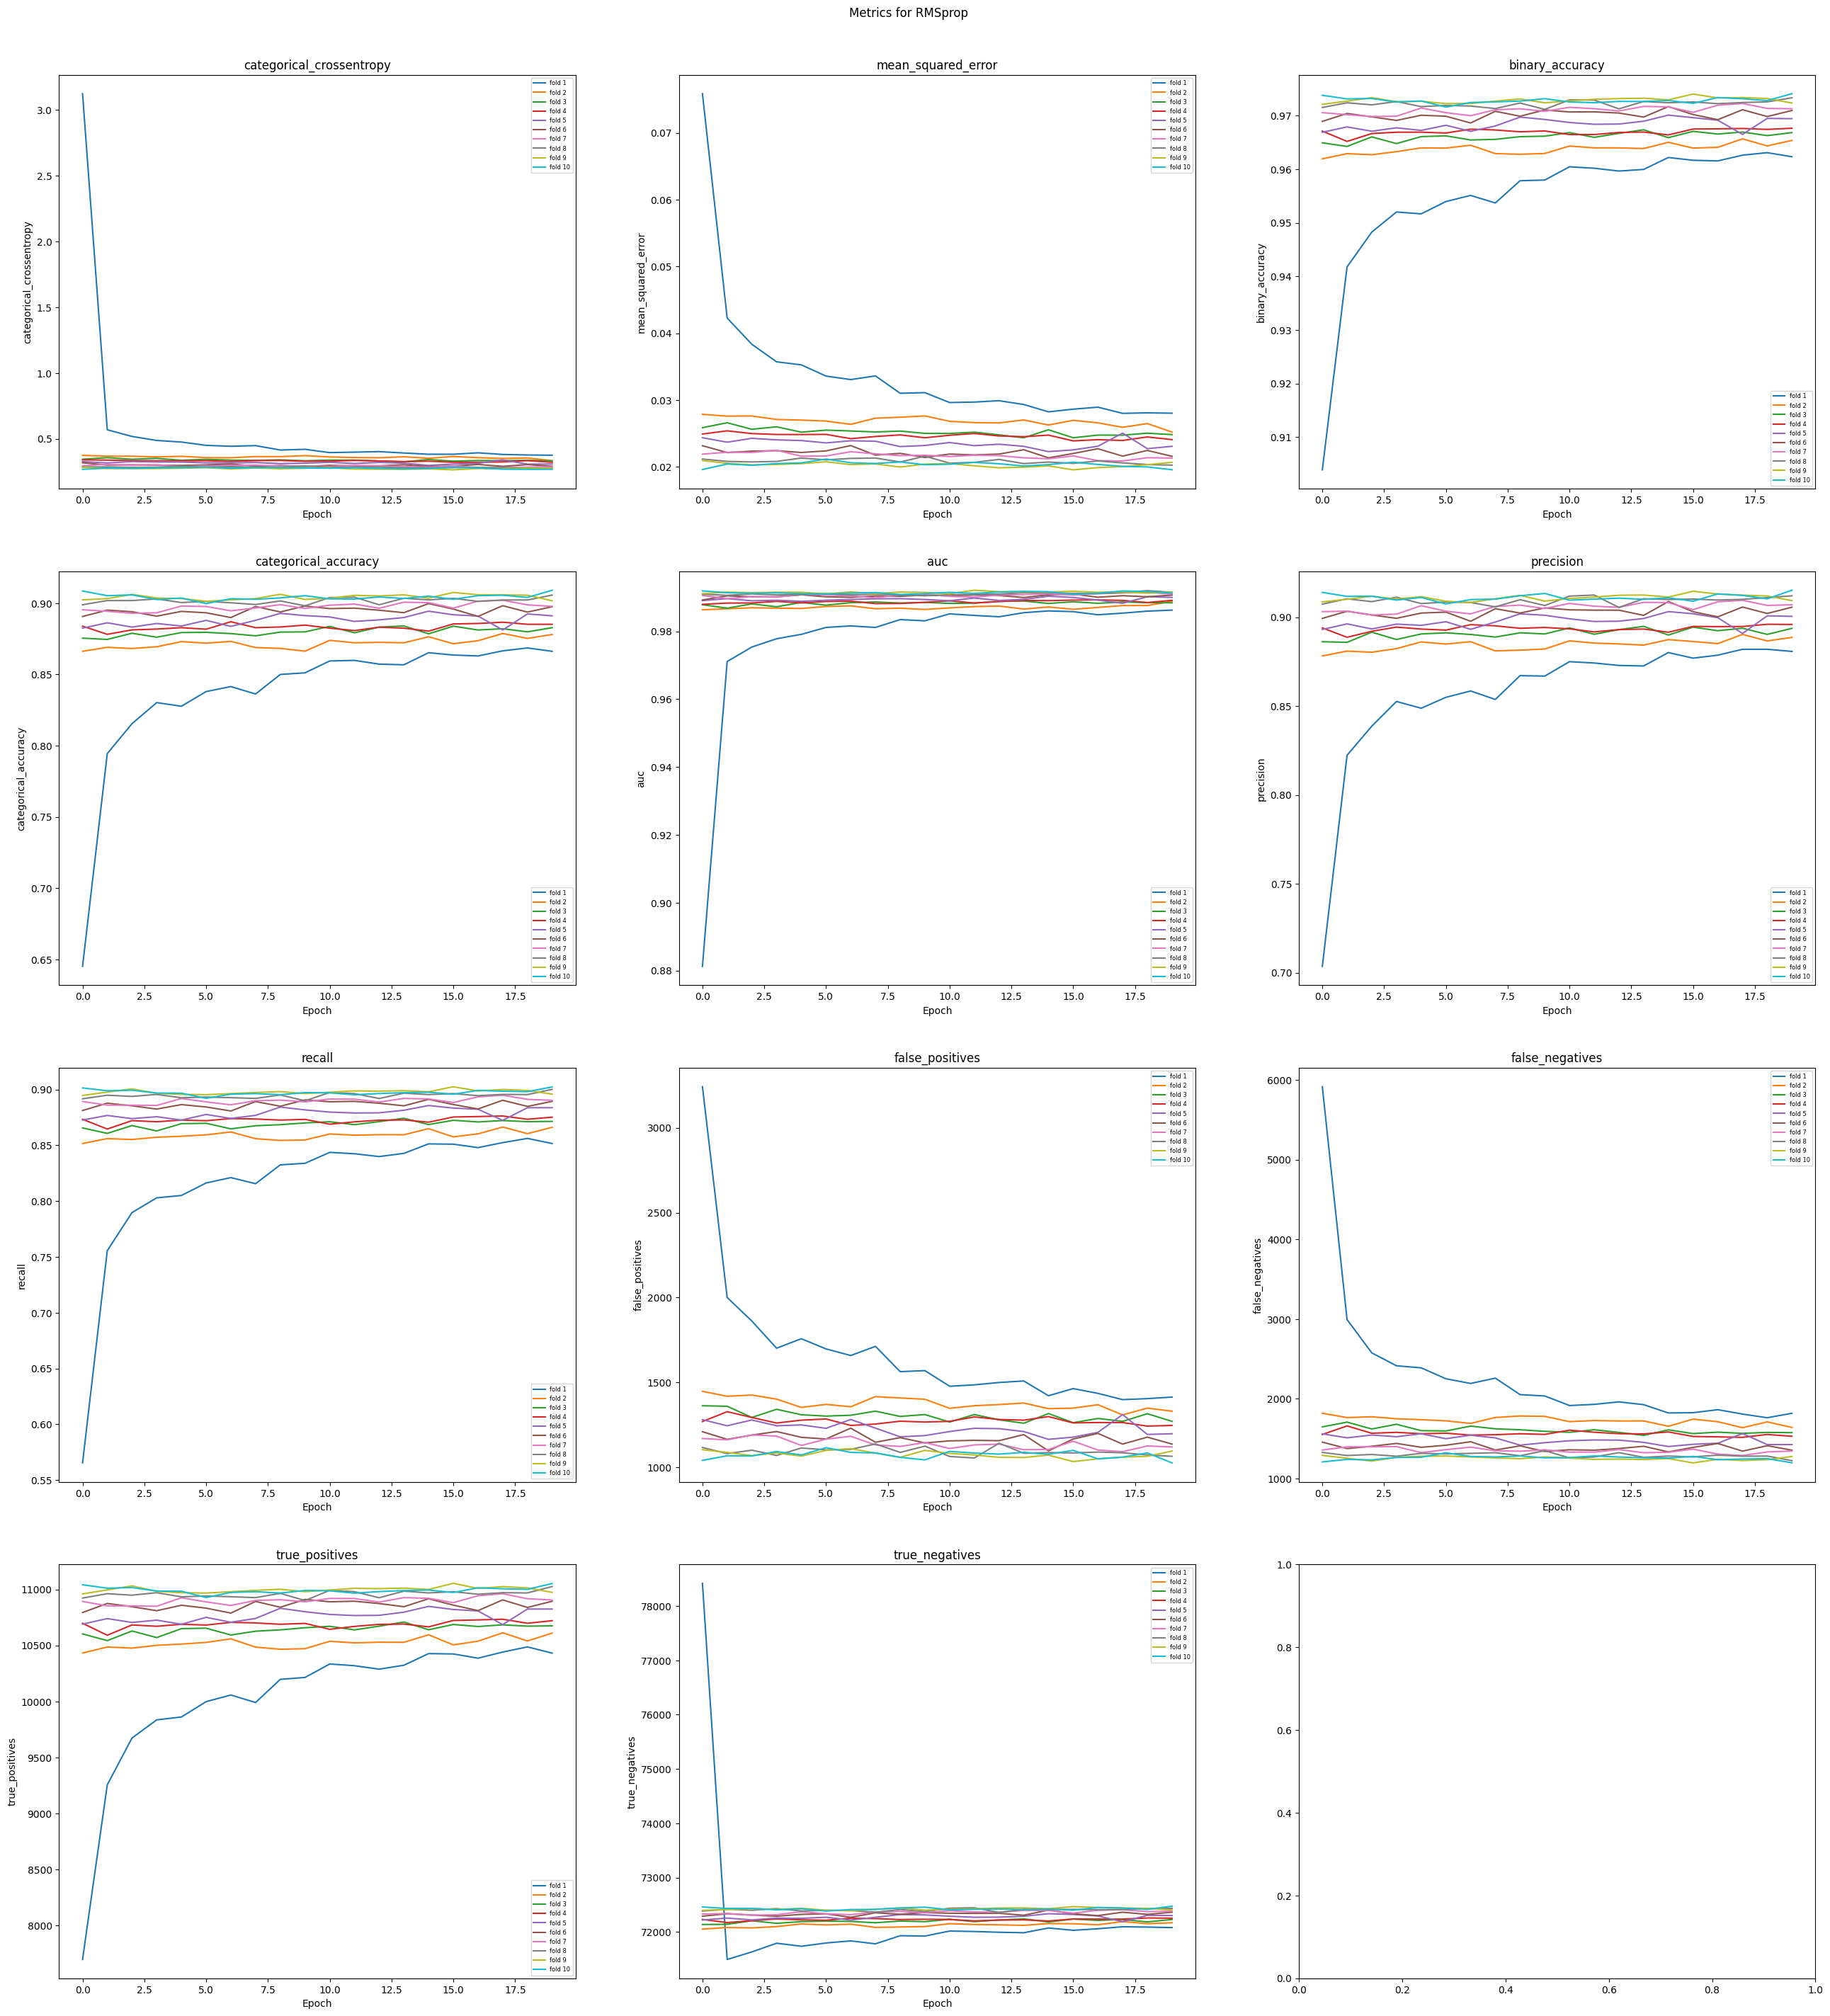

In [8]:
run_and_generate_output(loadPrepareDataforArff, 'Dry_Bean_Dataset.arff', getModelForDryBean, 'DryBean')

# Raisin

In [ ]:
def getModelForRaisin(in_dim, out_dim, optimizer, metric):
    model = Sequential()
    model.add(Conv1D(16, 3, activation='relu', input_shape=(in_dim, 1)))
    model.add(BatchNormalization())
    model.add(Conv1D(16, 3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dense(out_dim, activation='softmax')) 
    
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=metric)
    return model

In [ ]:
run_and_generate_output(loadPrepareDataforArff, 'Raisin_Dataset.arff', getModelForRaisin, 'Raisin')